# 사례연구 리스트 개요
- 강의명 : Python(파이썬), JAVA(자바)기반 AI활용 소프트웨어 개발 및 응용 과정
- 교과목명 : 머신러닝 기반 데이터 분석
- 평가주제 : 펭귄 데이터를 활용한 머신러닝 파이프라인 구축
- 능력단위요소 : 데이터 세트 분할하기, 지도학습 모델 적용하기, 모델성능 평가하기, 학습결과 적용하기
- 평가일 : 2023년 01월 12일 금요일
- 수강생명 : 박민


## 옵션
- Matplotlib 버전 업데이트

In [1]:
# matplotlib 최신 버전 (3.5.x) 반영
!pip install matplotlib -U

# 설치 후 런타임 재시작

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 55.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


- 시각화 옵션 설정

In [1]:
# visualization settings
import seaborn as sns

sns.set_context("talk")
sns.set_style("ticks")
sns.set_palette("colorblind")

## 1단계 데이터 불러오기 (5점)
- 펭귄 데이터를 불러옵니다. 
- 결측치, NULL값 제거하기
- 인덱스번호 재정렬

In [5]:
# 코드 작성
pen_df = sns.load_dataset('penguins')
pen_df = pen_df.dropna().reset_index(drop=True)
pen_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## 2단계 데이터셋 분리 (5점)
- 훈련데이터와 검증 데이터로 분리하는 코드를 작성합니다. 
- 데이터셋 분리 시, 층화추출 방식으로 분리합니다. 

In [6]:
# 코드 작성
from sklearn.model_selection import train_test_split
y = pen_df['body_mass_g']
x = pen_df.drop('body_mass_g', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = x[['species', 'island', 'sex']])
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((266, 6), (67, 6), (266,), (67,))

## 3단계 파이프라인 구축 (30점)
- 머신러닝 파이프라인을 구축하는 함수를 작성한다. 
- 함수 작성 시, Feature Engineering 기법도 같이 적용해야 한다. 

In [22]:
# 코드 작성
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

def Cmodel(en_features = ['species', 'island', 'sex'],
          s_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
          **kwargs):
  en_transformer = OneHotEncoder()
  s_transformer = StandardScaler()
  
  preprocessor = ColumnTransformer([('en', en_transformer, en_features), ('shape', s_transformer, s_features)])
  md = ('md', RandomForestRegressor(**kwargs))
  pl = Pipeline(steps = [('preprocessor', preprocessor), md])
  return pl

## 4단계 모델 생성 (5점)
- RandomForest 알고리즘을 활용하여 모델을 생성한다. 

- 파이프라인이 어떻게 적용 되는지 보여주는 코드

In [23]:
from sklearn import set_config
set_config(display='diagram')

In [24]:
# 코드 작성
model = Cmodel(random_state=0)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('en', OneHotEncoder(),
                                                  ['species', 'island', 'sex']),
                                                 ('shape', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('md', RandomForestRegressor(random_state=0))])

## 5단계 RandomSearh 적용 (30점)
- 하이퍼파라미터 튜닝 기법은 크게 Grid Search와 Random Search 크게 2가지 기법이 존재한다. 이 중에서 Random Search 기법을 활용하여 하이퍼 파라미터 튜닝을 진행한다. 


In [40]:
# 코드 작성
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

params = {"md__n_estimators": stats.randint(100, 300),
          "md__max_depth": stats.randint(3, 10),
          "md__min_samples_leaf": stats.randint(1, 10),
          "md__max_features": stats.uniform(0, 1),}
model = Cmodel(random_state=0)
rs = RandomizedSearchCV(model, param_distributions = params, n_iter = 20, scoring = 'r2', refit = 'r2')

In [41]:
rs.fit(x_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('en',
                                                                               OneHotEncoder(),
                                                                               ['species',
                                                                                'island',
                                                                                'sex']),
                                                                              ('shape',
                                                                               StandardScaler(),
                                                                               ['bill_length_mm',
                                                                                'bill_depth_mm',
                                                                                'flipper_length_mm'])])),
                                             ('md',
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=20,
                   param_distributions={'md__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc06bf607f0>,
                                        'md__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc06bedd1f0>,
                                        'md__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc06becffa0>,
                                        'md__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc06becfe80>},
                   refit='r2', scoring='r2')

In [42]:
import pandas as pd 
pd.DataFrame.from_dict(rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_md__max_depth,param_md__max_features,param_md__min_samples_leaf,param_md__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.136182,0.008888,0.013154,0.002417,6,0.08628,8,106,"{'md__max_depth': 6, 'md__max_features': 0.086...",0.817056,0.847244,0.859935,0.841709,0.782228,0.829634,0.027494,19
1,0.165191,0.011531,0.016488,0.005365,4,0.690035,3,126,"{'md__max_depth': 4, 'md__max_features': 0.690...",0.860680,0.856517,0.893447,0.878700,0.799536,0.857776,0.031976,7
2,0.261009,0.008063,0.019607,0.000926,6,0.22786,1,206,"{'md__max_depth': 6, 'md__max_features': 0.227...",0.850994,0.858725,0.895673,0.895517,0.819866,0.864155,0.028779,1
3,0.185476,0.007069,0.015640,0.000615,6,0.396008,3,145,"{'md__max_depth': 6, 'md__max_features': 0.396...",0.858933,0.858008,0.893897,0.888787,0.814287,0.862782,0.028403,3
4,0.148218,0.005719,0.013457,0.000579,8,0.054948,5,120,"{'md__max_depth': 8, 'md__max_features': 0.054...",0.838667,0.851724,0.879940,0.858285,0.802354,0.846194,0.025668,15
5,0.212971,0.006893,0.017462,0.001132,7,0.440364,3,170,"{'md__max_depth': 7, 'md__max_features': 0.440...",0.855970,0.860436,0.893950,0.886942,0.815304,0.862520,0.027788,4
6,0.292649,0.004627,0.022042,0.000845,8,0.089548,9,248,"{'md__max_depth': 8, 'md__max_features': 0.089...",0.816832,0.846841,0.864497,0.828751,0.780684,0.827521,0.028460,20
7,0.282748,0.004966,0.021638,0.001658,7,0.637003,4,215,"{'md__max_depth': 7, 'md__max_features': 0.637...",0.857753,0.856530,0.890543,0.881387,0.810768,0.859396,0.027674,5
8,0.360158,0.017206,0.027061,0.004552,7,0.7582,7,280,"{'md__max_depth': 7, 'md__max_features': 0.758...",0.860959,0.855214,0.889591,0.873904,0.800625,0.856058,0.030135,8
9,0.187216,0.002073,0.016642,0.002349,4,0.140716,5,155,"{'md__max_depth': 4, 'md__max_features': 0.140...",0.828606,0.855116,0.869963,0.852949,0.796910,0.840709,0.025605,16


## 6단계 모형 예측 (5점)
- 하이퍼 파라미터가 적용된 모델을 활용하여 훈련데이터와 테스트데이터에 각각 예측 결과를 산출한다.  

In [43]:
# 코드 작성
y_pred_tr = rs.predict(x_train)
y_pred_te = rs.predict(x_test)

y_pred_tr[:5], y_pred_te[:5]

(array([3616.74560439, 5673.31191862, 3954.1071636 , 5253.6942028 ,
        4677.94485917]),
 array([5658.6887192 , 4474.99955028, 4541.02043995, 5613.50099665,
        3988.58119577]))

## 7단계 모형 예측 결과 시각화 (20점)
- 각 산출된 예측 결과물을 실제 데이터와 비교하여 얼마나 잘 맞는지 확인하는 시각화 코드를 작성한다. 

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

c_train = "g"
c_val = "m"

def get_parity(y_train, y_val, y_pred_train, y_pred_val):
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5.5), constrained_layout=True, sharex=True, sharey=True)
    for ax, y_true, y_pred, c, title in zip(axs, [y_train, y_val], [y_pred_train, y_pred_val], [c_train, c_val], ["train", "valid"]):
        ax.scatter(y_true, y_pred, c=c)
        ax.set_xlabel("true", color="gray", labelpad=12)
        if ax == axs[0]:
            ax.set_ylabel("prediction", color="gray", labelpad=12)
        ax.set_title(title, color="gray", pad=12)

        r2 = r2_score(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared=False)

        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        limmin = min(xmin, ymin)
        limmax = max(xmax, ymax)
        ax.plot([limmin, limmax], [limmin, limmax], c="k", alpha=0.5)
        ax.set_xlim(limmin, limmax)
        ax.set_ylim(limmin, limmax)

        ax.text(0.95, 0.05, f"R2 = {r2:.3f}\nRMSE = {rmse:.3f}", ha="right", transform=ax.transAxes, fontsize=16)
    return fig, r2

- 예측된 모형 결괏값을 가져와서 시각화로 보여준다. 

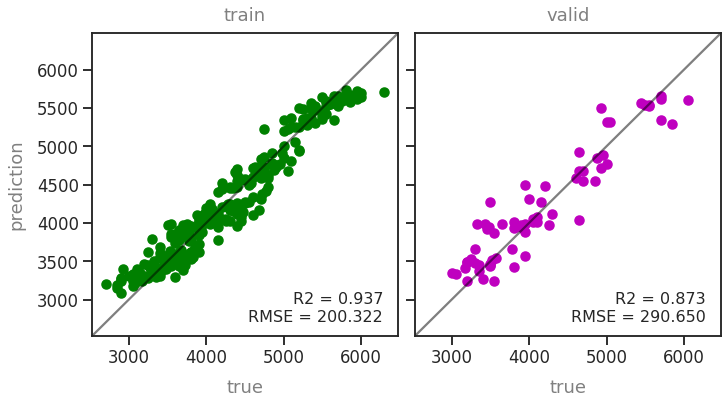

In [45]:
# 코드 작성
fig, r2_default = get_parity(y_train, y_test, y_pred_tr, y_pred_te)